<a href="https://colab.research.google.com/github/26Kenn07/Machine-Learning-Projects/blob/main/AQI_Category_Classification_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data**

In [33]:
df = pd.read_csv('/content/AQI and Lat Long of Countries.csv')

In [34]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


**Data Cleaning**

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [36]:
df.shape

(16695, 14)

In [37]:
df.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [38]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [39]:
df = df.drop(['Country', 'City','NO2 AQI Value', 'NO2 AQI Category'],axis=1)

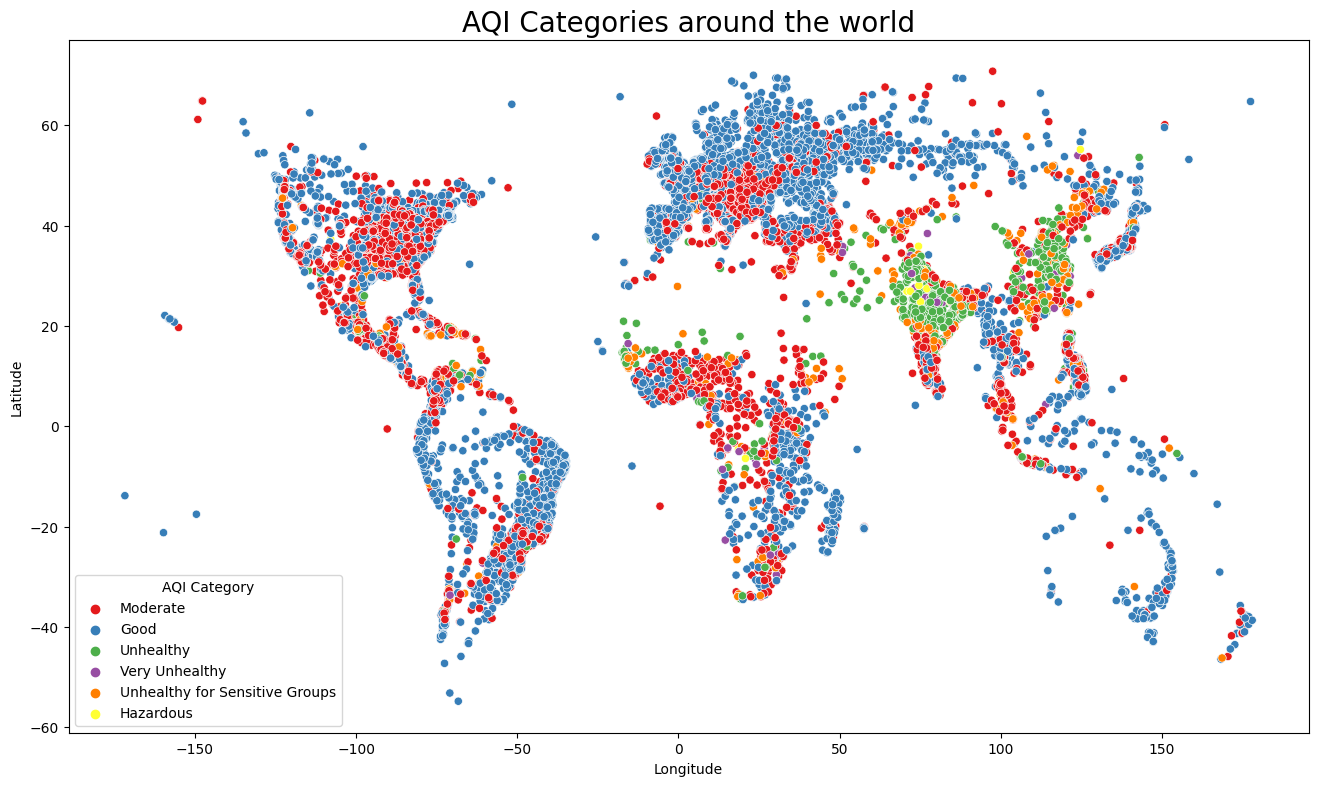

In [40]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x='lng',y='lat',hue='AQI Category',palette='Set1')
plt.title('AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [41]:
df = df.drop(['lat','lng'],axis=1)

In [42]:
df.head()

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,51,Moderate,1,Good,36,Good,51,Moderate
1,41,Good,1,Good,5,Good,41,Good
2,41,Good,1,Good,5,Good,41,Good
3,66,Moderate,1,Good,39,Good,66,Moderate
4,34,Good,1,Good,34,Good,20,Good


In [43]:
df['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups', 'Hazardous'], dtype=object)

In [44]:
df['CO AQI Category'].unique()

array(['Good', 'Unhealthy for Sensitive Groups', 'Moderate'], dtype=object)

In [45]:
df['Ozone AQI Category'].unique()

array(['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups'], dtype=object)

In [46]:
df['PM2.5 AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups', 'Hazardous'], dtype=object)

**Encoding**

In [24]:
from sklearn.preprocessing import LabelEncoder

In [47]:
LE = LabelEncoder()

In [48]:
df['AQI Category'] = LE.fit_transform(df['AQI Category'])

In [49]:
df['CO AQI Category'] = LE.fit_transform(df['CO AQI Category'])

In [50]:
df['Ozone AQI Category'] = LE.fit_transform(df['Ozone AQI Category'])

In [51]:
df['PM2.5 AQI Category'] = LE.fit_transform(df['PM2.5 AQI Category'])

In [52]:
df.head()

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,51,2,1,0,36,0,51,2
1,41,0,1,0,5,0,41,0
2,41,0,1,0,5,0,41,0
3,66,2,1,0,39,0,66,2
4,34,0,1,0,34,0,20,0


**Data Visualization**

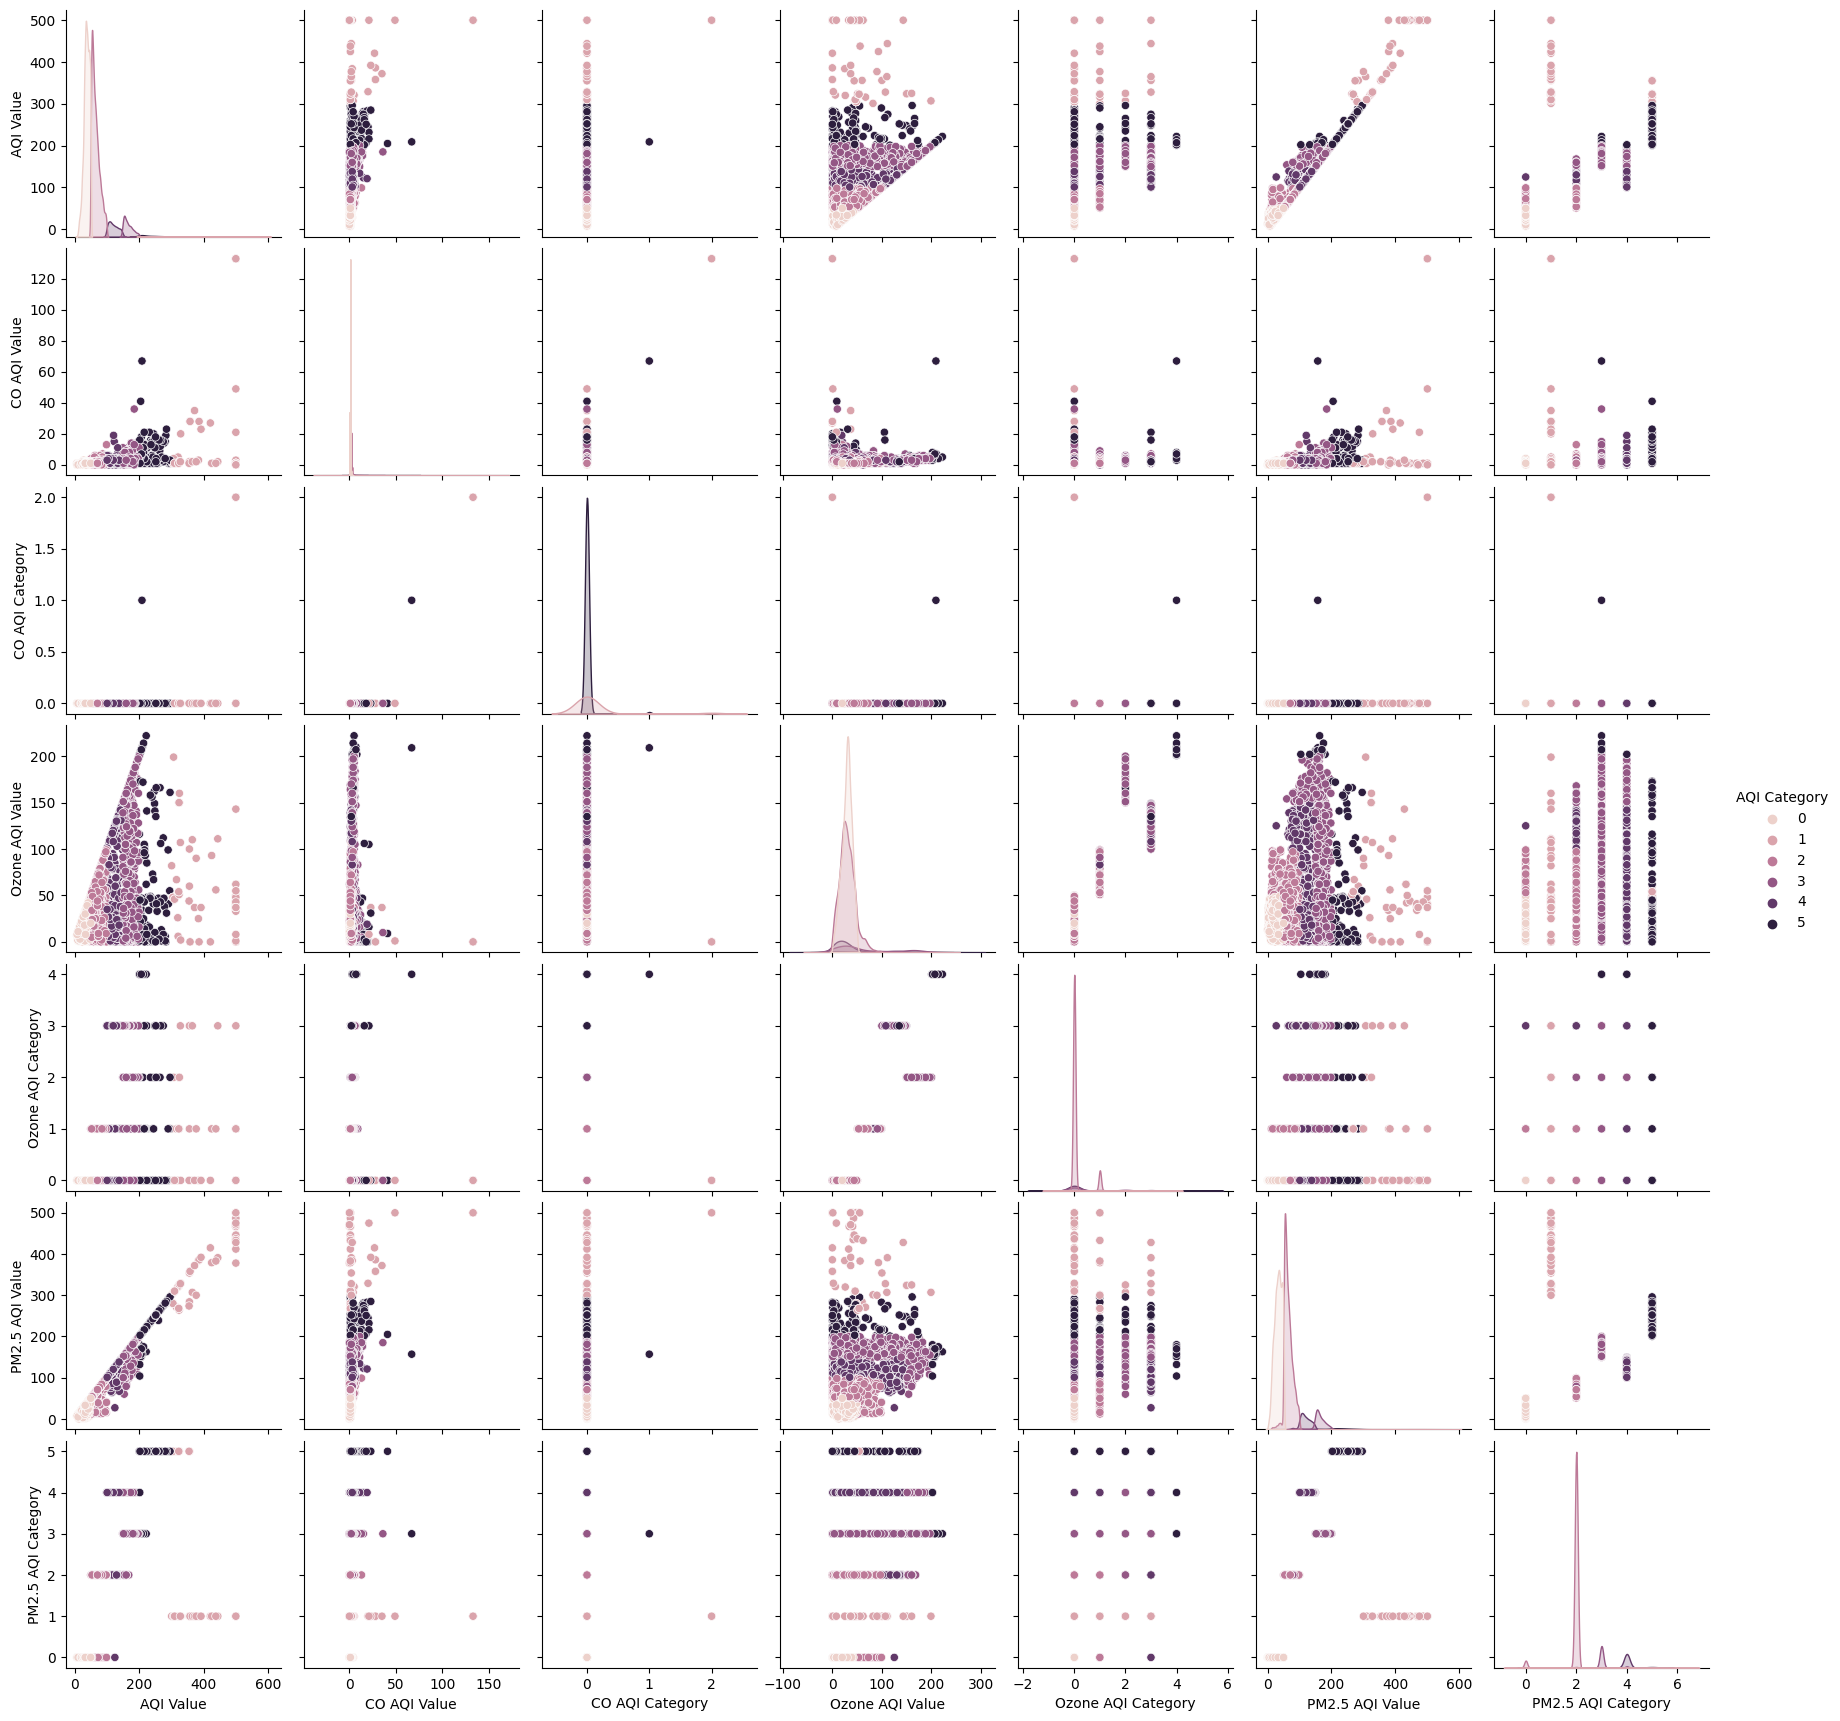

In [54]:
sns.pairplot(df,hue='AQI Category')
plt.show()

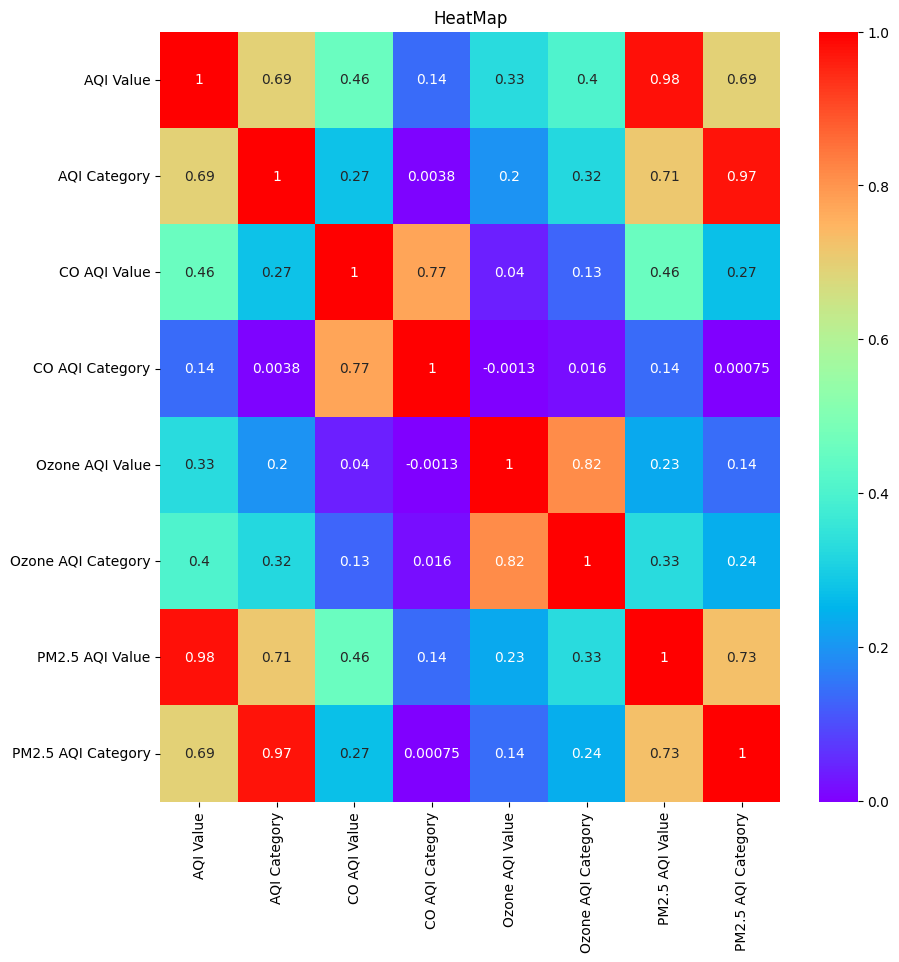

In [58]:
Corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(Corr,annot=True,cmap='rainbow')
plt.title('HeatMap')
plt.show()

**Train & Test Split**

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X = df.drop(columns='AQI Category',axis=1)
X

,AQI Value,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,51,1,0,36,0,51,2
1,41,1,0,5,0,41,0
2,41,1,0,5,0,41,0
3,66,1,0,39,0,66,2
4,34,1,0,34,0,20,0
...,...,...,...,...,...,...,...
16690,54,1,0,34,0,54,2
16691,71,1,0,39,0,71,2
16692,71,1,0,39,0,71,2
16693,50,1,0,20,0,50,0


In [61]:
y = df['AQI Category']
y

0        2
1        0
2        0
3        2
4        0
        ..
16690    2
16691    2
16692    2
16693    0
16694    2
Name: AQI Category, Length: 16695, dtype: int64

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Scaling**

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
SD = StandardScaler()

In [65]:
X_train_SD = SD.fit_transform(X_train)

In [66]:
X_test_SD = SD.transform(X_test)

**KNN Classifier & Gridsearchcv**

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
KNN = KNeighborsClassifier()

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
para ={
    'n_neighbors' : range(1,40)
}

In [71]:
GD = GridSearchCV(KNN,param_grid=para,scoring='accuracy',cv=10)

In [73]:
GD.fit(X_train_SD,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)}, scoring='accuracy')

In [74]:
GD.best_params_

{'n_neighbors': 3}

In [75]:
GD.best_score_

0.9993263473053892

In [76]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [77]:
KNN.fit(X_train_SD,y_train)

KNeighborsClassifier(n_neighbors=3)

**Prediction**

In [78]:
y_hat = KNN.predict(X_test_SD)

**Model Evaluation**

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [96]:
print(accuracy_score(y_test,y_hat))

0.998502545672357


In [97]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1569
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00      1431
           3       0.98      1.00      0.99       158
           4       1.00      0.98      0.99       147
           5       1.00      0.92      0.96        25

    accuracy                           1.00      3339
   macro avg       0.98      0.98      0.98      3339
weighted avg       1.00      1.00      1.00      3339



In [98]:
print(confusion_matrix(y_test,y_hat))

[[1569    0    0    0    0    0]
 [   0    9    0    0    0    0]
 [   0    0 1431    0    0    0]
 [   0    0    0  158    0    0]
 [   0    0    0    3  144    0]
 [   0    1    0    1    0   23]]
